### Necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime

In [2]:
file_path_volts = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1V.csv"
file_path_amps = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\LF1I.csv"
file_path_time_ticks = r"C:\Users\Paul\PycharmProjects\Sustainable-Energy-Behavior\dataset\H1\Tagged_Training_04_13_1334300401\TimeTicks1.csv"

volts = pd.read_csv(file_path_volts)
amps = pd.read_csv(file_path_amps)
time_ticks = pd.read_csv(file_path_time_ticks)

In [3]:
print(time_ticks.head())
time_ticks['Timestamp'] = pd.to_datetime(time_ticks['Timestamp'], unit='s')
print(time_ticks)

   1334300401.0224326
0        1.334300e+09
1        1.334300e+09
2        1.334300e+09
3        1.334300e+09
4        1.334300e+09


KeyError: 'Timestamp'

In [3]:
np_volts = np.array(volts)
np_amps = np.array(amps)
np_volts = np.array([[complex(y.replace("i", "j")) for y in x] for x in np_volts])
np_amps = np.array([[complex(y.replace("i", "j")) for y in x] for x in np_amps])

real_part_volts = np.real(np_volts)
imag_part_volts = np.imag(np_volts)
real_part_amps = np.real(np_amps)
imag_part_amps = np.imag(np_amps)
np_time_ticks = np.array(time_ticks)

In [7]:
power = np.array(np_volts)
print(np_volts)
for index in range(len(power)):
    angleV = math.atan2(imag_part_volts[index], real_part_volts[index])
    angleI = math.atan2(imag_part_amps[index], real_part_amps[index])
    cos = math.cos(angleV - angleI)

    power[index] = 0.5 * real_part_volts[index] * real_part_amps[index] * cos

print(power)

[[-1.07114891e+02+5.87512093e+01j -1.42212410e-03-2.01246440e-02j
   6.84539974e-01-1.95751593e-01j  2.34161410e-03+1.36201188e-03j
  -2.55030608e+00-5.81947684e-01j -9.70161578e-04+4.36473452e-03j]
 [-1.00918053e+02+6.88421173e+01j -2.37941183e-03+5.60436491e-03j
   6.02832258e-01-3.84293526e-01j  5.24653541e-03+5.56906080e-03j
  -2.52891588e+00+6.72276974e-01j -3.62093165e-03+8.74470733e-03j]
 [-9.37386703e+01+7.82940140e+01j  2.86795432e-04-7.85072241e-03j
   4.67998177e-01-5.36765039e-01j  5.85773215e-03-6.10435056e-03j
  -1.92068565e+00+1.77112162e+00j  5.81027335e-03+6.39550947e-03j]
 ...
 [-8.82531357e+01+8.44277344e+01j -1.22242738e-02+2.37486186e-03j
   3.03367704e-01-7.05511689e-01j -2.31351354e-03-1.50261521e-02j
  -1.02734756e+00+2.05688643e+00j  5.87581657e-03-5.43862954e-03j]
 [-8.39351044e+01+8.87252045e+01j -1.29827391e-02+3.37497634e-03j
   1.92210928e-01-7.46497512e-01j -4.02618479e-03-1.55733926e-02j
  -4.90242541e-01+2.25030565e+00j  3.96023458e-03-7.40237208e-03j]


TypeError: only length-1 arrays can be converted to Python scalars

In [21]:
abs_z = np.abs(np_amps)

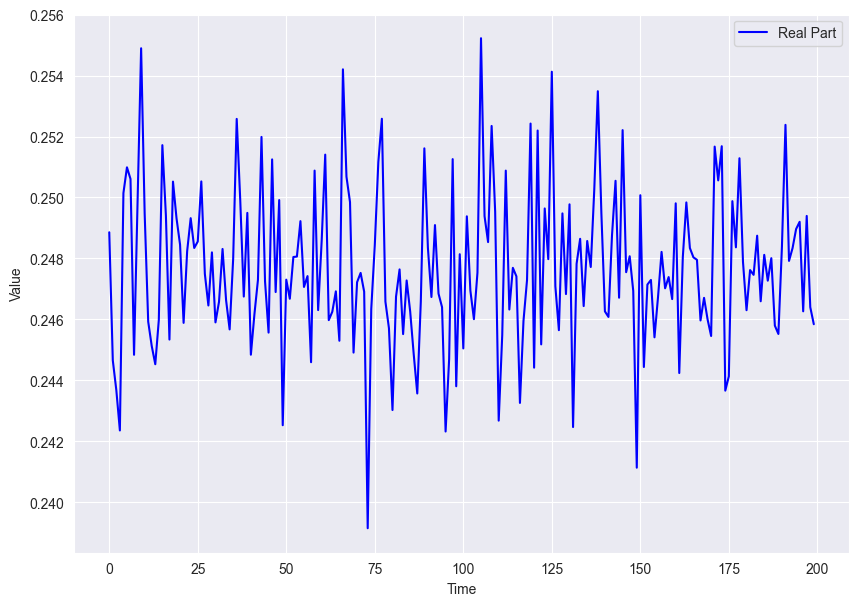

In [24]:
# Plot the real and imaginary parts separately
plt.figure(figsize=(10, 7))
plt.plot(range(200), abs_z.T[0][:200], linestyle='-', color='b', label='Real Part')
#plt.plot(range(200), abs_z.T[1][:200], linestyle='-', color='r', label='Imaginary Part')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

1. Voltage phaser => obtain graph that combines real part and imaginary part
2. sqrt(a^2, b^2)
3. arctan(b/a)